# URLs Phishing Detecting 

## B. Building ML models to create a classifier 
in this part i will build ml models, evaluate tham and choose the most accurate classifier for the task

In [1]:
#load requierd packages for this part
import pandas as pd
import numpy as np

#load packges for data prepration
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split

#evaluation packages
from sklearn import metrics

#plotting packges 
import seaborn as sns
import matplotlib as mpl
from matplotlib import pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

## 1.Prepare the Df to the ML Model

1. cheking for nulls and data types (no need for encoding there is no category)
2. evaluate the features and drop the features with no effect
 

### 1.1 Examine the data, check for nulls and data type

In [2]:
# Load the new data with the features
full_df = pd.read_csv(r"C:\Users\moshi\Downloads\notebooks\perceptionpoint\data\full_data.csv")
url_data= full_df.drop(['url'], axis = 1).copy() #drop the url colmun 
url_data=url_data.sample(frac=1).reset_index(drop=True) #shuffel 
url_data

,domain_len,have_dot,have_slash,have_ip,have_at,have_domain_sign,have_sub_directions,have_key_word,unique_words,html_tags,scripts_tags,frame_tags,domain_age,label
0,1,0,0,0,0,0,2,1,-1,-1,-1,1,0,1
1,1,1,0,0,0,1,2,0,21,6,0,0,0,1
2,0,0,1,0,0,0,6,1,137,14,0,0,0,1
3,0,0,0,0,0,0,2,0,2017,166,1,0,1,1
4,0,0,0,0,0,0,2,0,873,1072,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8995,0,0,0,0,0,0,2,0,524,35,0,0,0,0
8996,0,0,0,0,0,0,2,0,524,35,0,0,0,0
8997,1,0,0,0,0,1,2,0,2,1,0,0,1,1
8998,0,0,1,0,0,0,10,0,16667,2026,6,0,0,0


In [3]:
# check for nulls values 
full_df.isnull().sum()

url                    0
domain_len             0
have_dot               0
have_slash             0
have_ip                0
have_at                0
have_domain_sign       0
have_sub_directions    0
have_key_word          0
unique_words           0
html_tags              0
scripts_tags           0
frame_tags             0
domain_age             0
label                  0
dtype: int64

In [4]:
# check features datatypes
full_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   url                  9000 non-null   object
 1   domain_len           9000 non-null   int64 
 2   have_dot             9000 non-null   int64 
 3   have_slash           9000 non-null   int64 
 4   have_ip              9000 non-null   int64 
 5   have_at              9000 non-null   int64 
 6   have_domain_sign     9000 non-null   int64 
 7   have_sub_directions  9000 non-null   int64 
 8   have_key_word        9000 non-null   int64 
 9   unique_words         9000 non-null   int64 
 10  html_tags            9000 non-null   int64 
 11  scripts_tags         9000 non-null   int64 
 12  frame_tags           9000 non-null   int64 
 13  domain_age           9000 non-null   int64 
 14  label                9000 non-null   int64 
dtypes: int64(14), object(1)
memory usage: 1.0+ MB


### 1.2 Feature reduction

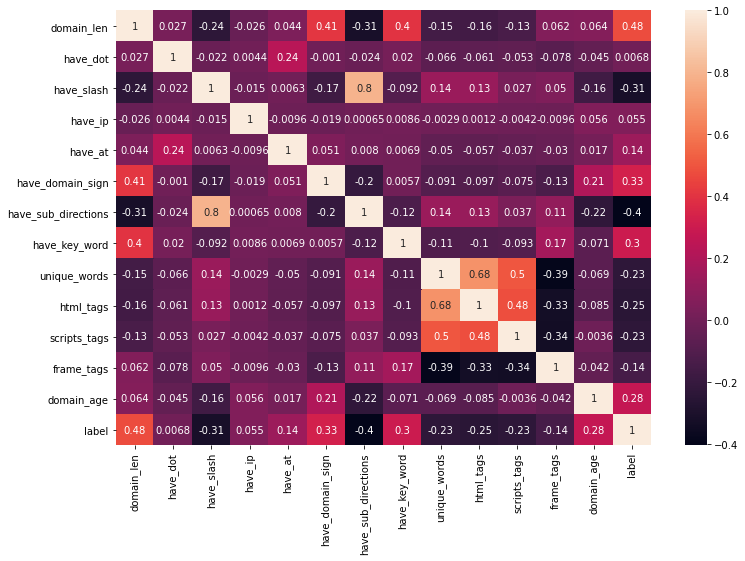

In [5]:
#plot a correlation heatmap to check the efficency of features and correlations between them
corr=url_data.corr()

plt.figure(figsize=(12,8))
sns.heatmap(corr,annot=True);

## 2. Machine Learning Classifier And Evaluation
in this part i will try and examine 3 different classifiers and evalute each one of tham to choose the best one for this task

1. RandomForestClassifier
2. XGboost Classifier
3. Decision Tree

In [ ]:
# Load MachineLearning Models
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# Helper functions for evaluation

# This function print and save the results of the models
def printAccuracy(model,y_train,y_test,y_train_pred,y_pred):
    print(model,"Accuracy")
    print("Accuracy on training data: {:.4f}".format(metrics.accuracy_score(y_true = y_train, y_pred = y_train_pred)))
    print("Accuracy on test data: {:.4f}".format(metrics.accuracy_score(y_true = y_test, y_pred = y_pred)))
    
# This function print the result of confusion matrix                       
def printConfusionMatrix(y_test,y_pred):
    confusion = metrics.confusion_matrix(y_test, y_pred)
    print(confusion)
    print('')
    print('TP =',confusion[1, 1])
    print('TN =',confusion[0, 0])
    print('FP =',confusion[0, 1])
    print('FN =',confusion[1, 0])

### Data Scaling and Splitting (Not really needed, but gave better results)

In [41]:
#extract the features and scale them for the model 
features =url_data.drop(['label'],axis=1)
scaler = StandardScaler()
origin_scale_rf=StandardScaler().fit(features.values)

X = scaler.fit_transform(features.values)
X= X[:url_data.shape[0]]
y = url_data['label'].values

In [42]:
#split the data to train and test using 80% train and 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42,test_size=0.2)

### 2.1 RandomForestClassifier

#### Hyperparameters tuning

In [ ]:
# Grid search for finding the best parameters for the classifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'bootstrap': [True],
    'max_depth': [60, 70, 80, 90],
    'max_features': ['auto'],
    'min_samples_leaf': [2, 3, 4],
    'min_samples_split': [2, 4, 6],
    'n_estimators': [100, 144, 300, 600]
    }
rf = RandomForestClassifier()
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)
grid_search.fit(X_train,y_train)

##grid_search.best_params_ result
# 'bootstrap': True,
# 'max_depth': 90,
# 'max_features': 'auto'
# 'min_samples_leaf': 2
# 'min_samples_split': 2
# 'n_estimators': 144

### Model

In [43]:
rf_model=RandomForestClassifier(bootstrap= True,max_depth=90,max_features='auto',min_samples_leaf=2,min_samples_split= 2,n_estimators=144)
rf_model.fit(X_train,y_train)#fit the model

# Predictions
y_pred = rf_model.predict(X_test)
y_train_pred = rf_model.predict(X_train)

### Random Forest Evalutaion

In [44]:
printAccuracy("RendomForestclassifier",y_train,y_test,y_train_pred,y_pred)

RendomForestclassifier Accuracy
Accuracy on training data: 0.9550
Accuracy on test data: 0.9422


In [45]:
printConfusionMatrix(y_test,y_pred)

[[861  30]
 [ 74 835]]

TP = 835
TN = 861
FP = 30
FN = 74


## 2.2 XGboost 

### Model

In [ ]:
xgb_model = XGBClassifier(learning_rate=0.4,max_depth=7)
xgb_model.fit(X_train, y_train)#fit the model

y_pred = xgb_model.predict(X_test)
y_train_pred = xgb_model.predict(X_train)

### Evaluation

In [35]:
printAccuracy("XGBoost Classifier",y_train,y_test,y_train_pred,y_pred)

XGBoost Classifier Accuracy
Accuracy on training data: 0.9650
Accuracy on test data: 0.9439


In [36]:
printConfusionMatrix(y_test,y_pred)

[[863  28]
 [ 73 836]]

TP = 836
TN = 863
FP = 28
FN = 73


### 3.3 Decision tree

#### Hyperparameters tuning

In [37]:
depths=list(range(1,6))#list of depths for check from 1-6 
min_samples=list(range(500,15000,1000))#list of samples for check from 10% to 100% 
param_grid = { 'criterion':['gini','entropy'],'max_depth':depths,'min_samples_split':min_samples}
dt_grid=DecisionTreeClassifier()# decision tree model
dftree_gscv = GridSearchCV(dt_grid, param_grid, cv=5)#use gridsearch to test all values with 5 folds
dftree_gscv.fit(X_train, y_train)
    
dftree_gscv.best_params_

##best parameters from grid are:
# {'criterion': 'entropy',
#  'max_depth': 5
#  'min_samples_split': 500}

{'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 500}

### Model 

In [38]:
dt_model = DecisionTreeClassifier(criterion='entropy',max_depth = 5,min_samples_split=500)
dt_model.fit(X_train, y_train)# fit the model 

y_pred = dt_model.predict(X_test)
y_train_pred = dt_model.predict(X_train)

### Evaluate

In [39]:
printAccuracy("DecisionTree Classifier",y_train,y_test,y_train_pred,y_pred)

DecisionTree Classifier Accuracy
Accuracy on training data: 0.8653
Accuracy on test data: 0.8689


In [40]:
printConfusionMatrix(y_test,y_pred)

[[774 117]
 [119 790]]

TP = 790
TN = 774
FP = 117
FN = 119
